/home/changwan/GPR/BSCAN/PROCESSOR2/BPF
<class 'pandas.core.frame.DataFrame'>
Float64Index: 512 entries, 0.0 to 511.0
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fft_real   512 non-null    float64
 1   fft_imag   512 non-null    float64
 2   fft_dB     512 non-null    float64
 3   ifft_real  512 non-null    float64
 4   ifft_imag  512 non-null    float64
dtypes: float64(5)
memory usage: 24.0 KB
0.0       0.000000
1.0     -28.126802
2.0     -28.879827
3.0     -30.153625
4.0     -30.196748
           ...    
507.0   -30.626215
508.0   -30.196745
509.0   -30.153624
510.0   -28.879826
511.0   -28.126801
Name: fft_dB, Length: 512, dtype: float64


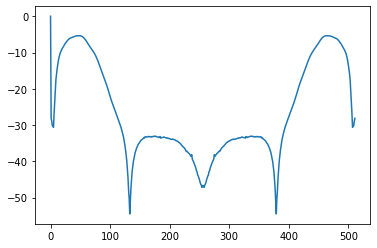

In [39]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz
    from scipy.fftpack import fft, fftfreq, ifft
    
    print(os.getcwd())
    #read *.txt file
    columns = ["fft_real", "fft_imag", "fft_dB", "ifft_real", "ifft_imag"]
    
    output = np.loadtxt("FFT.txt")
    index = np.linspace(0, (output.shape[0]-1), output.shape[0], dtype= 'float64')

    output_2 = pd.DataFrame(output,index, columns)
    
    output_2.info()
    
    plt.plot(output_2["fft_dB"])
    print(output_2["fft_dB"])
    #plt.grid()

In [40]:
tw = 295.894257 * 10**(-9)   #time window
samples = output_2.size
#print(samples)
fs = (1.0/tw)/samples          #sampling frequency
nyq = 0.5 * fs *256               #nyquest frequency
                             #frequency interval
print(tw)
print (fs)
print (fs*512)
print (nyq)
#lowcut = 500.0
#highcut = 1250.0

lowcut = 30*10**6
highcut = 110*10**6
    
for order in [1, 5, 10]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, fs=fs, worN=2000)
        plt.plot(w, abs(h), label="order = %d" % order)
        
plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
           '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

2.95894257e-07
1320.1506644990409
675917.1402235089
168979.28505587723


ValueError: Digital filter critical frequencies must be 0 < Wn < fs/2 (fs=1320.1506644990409 -> fs/2=660.0753322495204)

In [42]:
y = butter_bandpass_filter(output_2["fft_dB"],lowcut, highcut, fs, order=6)
plt.plot(y)
plt.grid()
#plt.clf()

ValueError: Digital filter critical frequencies must be 0 < Wn < fs/2 (fs=1320.1506644990409 -> fs/2=660.0753322495204)